In [28]:
import cv2
import random
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [29]:
image_dir = "C:/Users/HP/ocr"
files = os.listdir(image_dir)

In [30]:
image_path = "{}/{}".format(image_dir, "car10.jpg")

In [31]:
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [32]:
def plot_ima(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

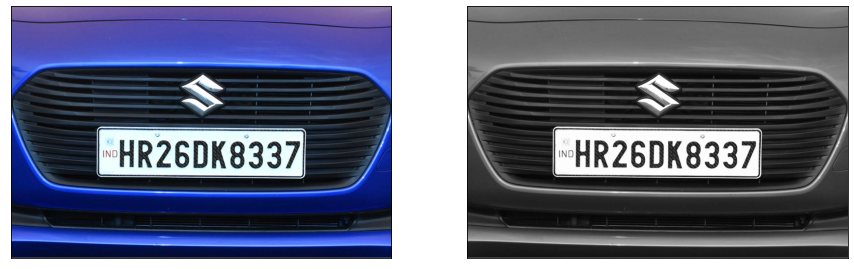

In [33]:
plot_ima(image, gray)

In [34]:
blur = cv2.bilateralFilter(gray, 11,90,90)

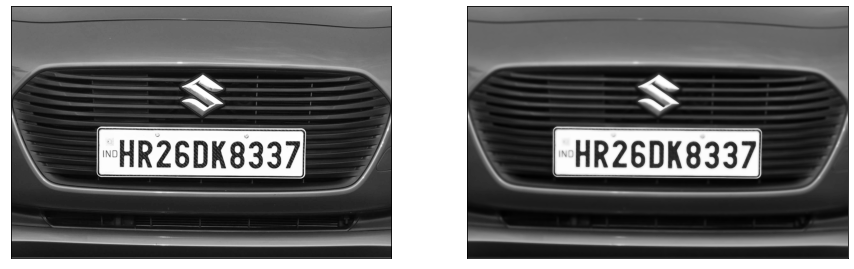

In [35]:
plot_ima(gray, blur)

In [36]:
edges = cv2.Canny(blur, 40,200)

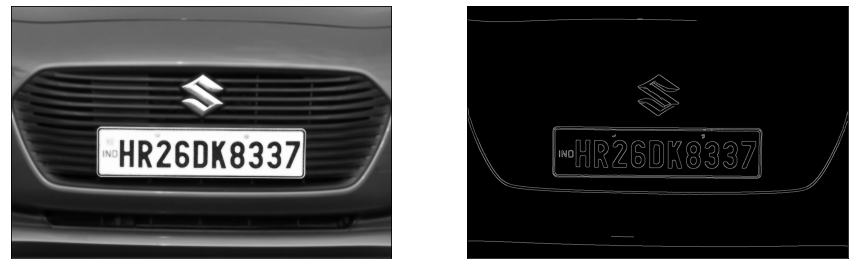

In [37]:
plot_ima(blur, edges)

In [38]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [39]:
image_copy = image.copy()

In [40]:
d= cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

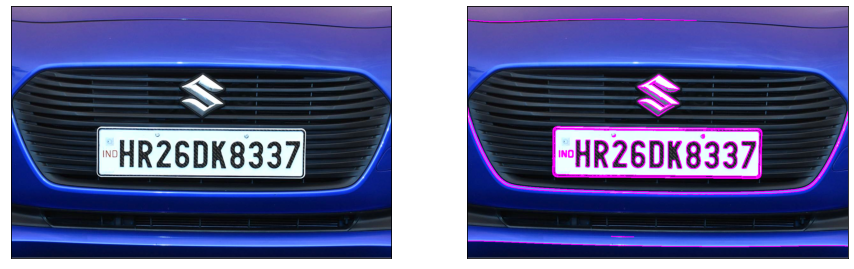

In [41]:
plot_ima(image, image_copy)

In [42]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]

In [43]:
image_copy = image.copy()
d= cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

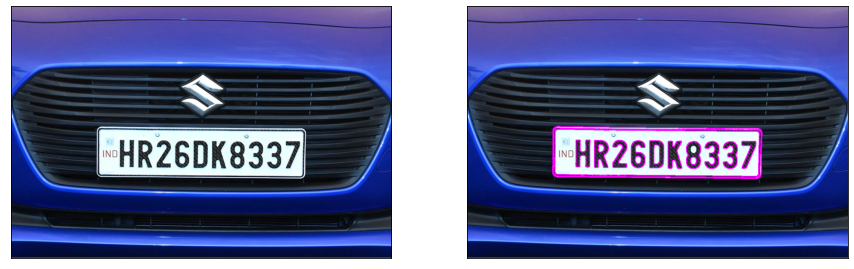

In [44]:
plot_ima(image, image_copy)

In [45]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.05* perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite("plate.png", plate)

True

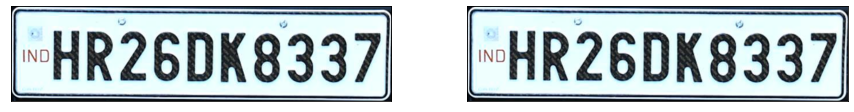

In [46]:
plot_ima(plate, plate)